In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
#import imutils
%matplotlib inline 

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
def show_image(image, title=None):
    channels = image.shape[2] if len(image.shape) == 3 else 1
    if channels == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    oldfigsize = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (5,5)
    plt.autoscale(enable=True, axis='both', tight=False)
    plt.axis('off')
    plt.imshow(image, aspect='equal', interpolation='gaussian', cmap='gray' if channels == 1 else None)
    plt.title(title)
    plt.show()
    plt.rcParams["figure.figsize"] = oldfigsize
image = cv2.imread('sample6.jpg', cv2.IMREAD_GRAYSCALE)

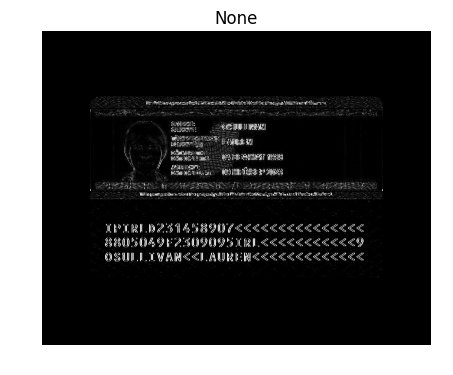

In [13]:
def simplify_image(image):
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
    sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
#    gray = cv2.GaussianBlur(image, (1, 1), 0)
    gray = image
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
    gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
    gradX = np.absolute(gradX)
    (minVal, maxVal) = (np.min(gradX), np.max(gradX))
    gradX = (255 * ((gradX - minVal) / (maxVal - minVal))).astype("uint8")

    return gradX

show_image(simplify_image(cv2.imread("sample6.jpg", cv2.IMREAD_GRAYSCALE)))

In [9]:
cv2.imwrite("mask_bracket/data/simple_sample.jpg", simplify_image(cv2.imread("sample6.jpg", cv2.IMREAD_GRAYSCALE)))

True

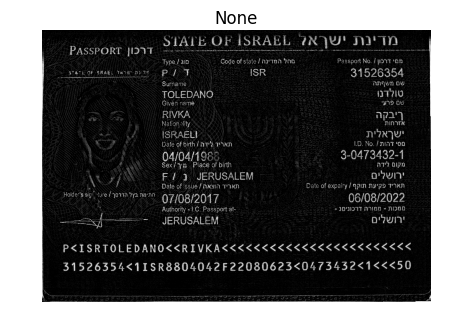

In [55]:
show_image(simplify_image(cv2.imread("/Users/marvin/Downloads/passport_examples/Israel-Two-Iranians-article-pic-1.jpg", cv2.IMREAD_GRAYSCALE)))

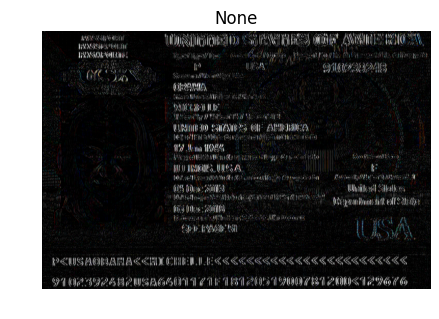

In [15]:
show_image(simplify_image(cv2.imread("/Users/marvin/Downloads/passport_examples/passport23.jpg")))